# Project: World Progress

In this project, I will explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

In [35]:
# These lines import the NumPy and Datascience modules.
from datascience import *
import numpy as np

# These lines do some fancy plotting magic.
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import d8error

## 1. Global Population Growth

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="https://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
    <img src="pew_population_projection.png"/> 
</a>

In this part of the project, I will examine some of the factors that influence population growth and how they have been changing over the years and around the world. There are two main sub-parts of this analysis.

- First, I will examine the data for one country, Bangladesh. I will see how factors such as life expectancy, fertility rate, and child mortality have changed over time in Bangladesh, and how they are related to the rate of population growth.
- Next, I will examine whether the changes I have observed for Bangladesh are particular to that country or whether they reflect general patterns observable in other countries too. I will study aspects of world population growth and see how they have been changing.

The first table we will consider contains the total population of each country over time. Run the cell below.

In [4]:
population = Table.read_table('population.csv').where("time", are.below(2021))
population.show(3)

geo,time,population_total
afg,1800,3280000
afg,1801,3280000
afg,1802,3280000


**Note:** The population csv file can also be found [here](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv). The data for this project was downloaded in February 2017.

### Bangladesh

The nation of [Bangladesh](https://en.wikipedia.org/wiki/Bangladesh#People's_Republic_of_Bangladesh) was established as a parliamentary democracy after the Bangladesh Liberation War ended in 1971. The war-ravaged fledgling nation was almost immediately faced with floods and famine. In this section of the project, I will examine aspects of the development of Bangladesh since that time.

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. I will begin by taking a close look at Bangladesh. I used the Alpha-3 link to find the 3-letter code for Bangladesh.

I created a table called `b_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2020 (including both 1970 and 2020) and the second should contain the population of Bangladesh in each of those years.



In [5]:
bgd_pop = population.where("geo", are.equal_to("bgd")).select("time", "population_total")
b_pop = bgd_pop.where("time", are.between_or_equal_to(1970,2020))
b_pop

time,population_total
1970,64232486
1971,65531635
1972,66625706
1973,67637541
1974,68742222
1975,70066310
1976,71652386
1977,73463593
1978,75450033
1979,77529040


Then I created a table called `b_five` that has the population of Bangladesh every five years. At a glance, it appears that the population of Bangladesh has been growing quickly indeed!

In [6]:
b_pop.set_format('population_total', NumberFormatter)

fives = np.arange(1970, 2021, 5) # 1970, 1975, 1980, ...
b_five = b_pop.sort('time').where('time', are.contained_in(fives))
b_five.show()

time,population_total
1970,"64,232,486"
1975,"70,066,310"
1980,"79,639,498"
1985,"90,764,180"
1990,"103,171,957"
1995,"115,169,933"
2000,"127,657,862"
2005,"139,035,505"
2010,"147,575,433"
2015,"156,256,287"


I assign `initial` to an array that contains the population for every five year interval from 1970 to 2015 (inclusive). Then, assign `changed` to an array that contains the population for every five year interval from 1975 to 2020 (inclusive). The first array should include both 1970 and 2015, and the second array should include both 1975 and 2020. I used the `b_five` table to create both arrays, by first filtering the table to only contain the relevant years.

The annual growth rate for a time period is equal to:

$$(\frac{\text{Population at end of period}}{\text{Population at start of period}}^{\frac{1}{\text{number of years}}} )-1$$

I have provided the code below that uses  `initial` and `changed` in order to add a column to `b_five` called `annual_growth`.

If you are interested in how I came up with the formula for growth rates, consult the [growth rates](https://inferentialthinking.com/chapters/03/2/1/Growth.html) section of this textbook.

In [7]:
initial = b_five.where("time", are.between_or_equal_to(1970,2015)).column("population_total")
changed = b_five.where("time", are.between_or_equal_to(1975,2020)).column("population_total")

b_1970_through_2015 = b_five.where('time', are.below_or_equal_to(2015)) 
b_five_growth = b_1970_through_2015.with_column('annual_growth', (changed/initial)**0.2-1)
b_five_growth.set_format('annual_growth', PercentFormatter)

time,population_total,annual_growth
1970,"64,232,486",1.75%
1975,"70,066,310",2.59%
1980,"79,639,498",2.65%
1985,"90,764,180",2.60%
1990,"103,171,957",2.22%
1995,"115,169,933",2.08%
2000,"127,657,862",1.72%
2005,"139,035,505",1.20%
2010,"147,575,433",1.15%
2015,"156,256,287",1.06%


While the population has grown every five years since 1970, the annual growth rate decreased dramatically from 1985 to 2015. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional tables of measurements about countries over time.

In [8]:
life_expectancy = Table.read_table('life_expectancy.csv').where('time', are.below(2021))
child_mortality = Table.read_table('child_mortality.csv').relabel(2, 'child_mortality_under_5_per_1000_born').where('time', are.below(2021))
fertility = Table.read_table('fertility.csv').where('time', are.below(2021))

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

Run the following cells below to see `life_expectancy`, `child_mortality`, and `fertility`. Refer back to these tables as needed. It will be helpful for further insight to this topic.

In [9]:
life_expectancy.show(3)

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19


In [10]:
child_mortality.show(3)

geo,time,child_mortality_under_5_per_1000_born
afg,1800,468.58
afg,1801,468.58
afg,1802,468.58


In [11]:
fertility.show(3)

geo,time,children_per_woman_total_fertility
abw,1800,5.64
abw,1801,5.64
abw,1802,5.64


Perhaps population is growing more slowly because people aren't living as long. I will use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Bangladesh.

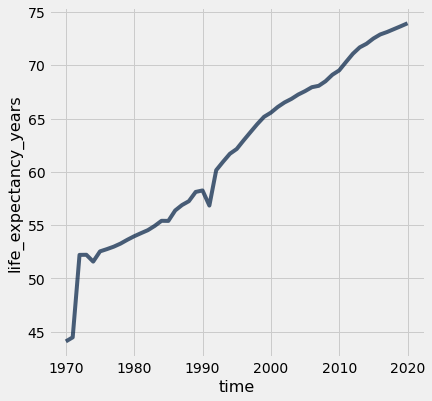

In [36]:
life_expectancy_bgd = life_expectancy.where("geo", are.equal_to("bgd")).where("time" , are.above_or_equal_to(1970))
life_expectancy_bgd.plot("time", "life_expectancy_years")

Assuming everything else stays the same, we can see the trends in life expectancy in the graph above directly explain why the population growth rate decreased from 1985 to 2015 in Bangladesh.

Futhermore, as we can see from the graph, life expectancy increases throughout the year. Possibly, the reasons why the population growth rate slowed down is because people are living longer now and thus, do not need to create more children for survival purposes. However, on 1991 we can see that the population decreased quite a bit and this is due to a cyclone that hit Bangladesh on that year

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49.

I completed the function `fertility_over_time`. It takes the Alpha-3 code of a country as `country_code` and a `start` year. It returns a two-column table with labels `Year` and `Children per woman` that can be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. The plot should include the `start` year and all later years that appear in the `fertility` table. 

Then, I determined the Alpha-3 code for Bangladesh. The code for Bangladesh and the year 1970 are used in the call to your `fertility_over_time` function in order to plot how Bangladesh's fertility rate has changed since 1970. Note that the function `fertility_over_time` should not return the plot itself. **The expression that draws the line plot is provided for you; please don't change it.**

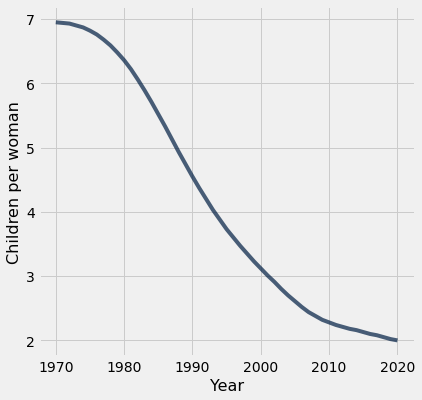

In [37]:
def fertility_over_time(country_code, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    country_fertility = fertility.where("geo", country_code)
    country_fertility_after_start = country_fertility.where("time", are.above_or_equal_to(start))
    country_fertility_after_start
    cleaned_table = country_fertility_after_start.relabeled("time", "Year").relabeled("children_per_woman_total_fertility", "Children per woman").select("Year", "Children per woman")
    return cleaned_table

bangladesh_code = "bgd"
fertility_over_time(bangladesh_code, 1970).plot(0, 1)

Assuming everything else is constant, we can see trends in fertility in the graph above help directly explain why the population growth rate decreased from 1980 to 2020 in Bangladesh.

As earlier we mentioned that since life expectancy is getting better, the amount of children might have decrease as well. As we can see in this grah above, it just proves what we hypothesize earlier. Since the number of birth per woman is decreasing, we can see that the rate of population growth should decrease as well.

It has been [observed](https://www.ageing.ox.ac.uk/download/143) that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. In the reverse direction, having fewer children may allow families to devote more resources to each child, reducing child mortality. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

Using both the `fertility` and `child_mortality` tables, I will draw a scatter diagram that has Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis with one point for each year, starting with 1970.

I also created a table called `post_1969_fertility_and_child_mortality` with the appropriate column labels and data in order to generate the chart correctly. I used the label `Children per woman` to describe total fertility and the label `Child deaths per 1000 born` to describe child mortality.

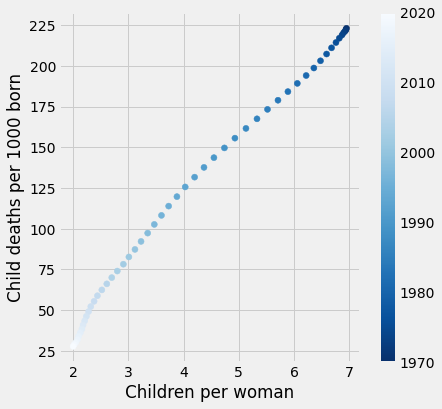

In [38]:
bgd_fertility = fertility.where("geo", "bgd").drop("geo")
bgd_child_mortality = child_mortality.where("geo", "bgd").drop("geo")
fertility_and_child_mortality = bgd_fertility.join("time", bgd_child_mortality)
post_1969_fertility_and_child_mortality = bgd_fertility.join("time", bgd_child_mortality).where("time", are.above_or_equal_to(1970))
post_1969_fertility_and_child_mortality = post_1969_fertility_and_child_mortality.relabeled("children_per_woman_total_fertility", "Children per woman")
post_1969_fertility_and_child_mortality = post_1969_fertility_and_child_mortality.relabeled("child_mortality_under_5_per_1000_born", "Child deaths per 1000 born")

x_births = post_1969_fertility_and_child_mortality.column("Children per woman")
y_deaths = post_1969_fertility_and_child_mortality.column("Child deaths per 1000 born")
time_colors = post_1969_fertility_and_child_mortality.column("time")

plots.figure(figsize=(6,6))
plots.scatter(x_births, y_deaths, c=time_colors, cmap="Blues_r")
plots.colorbar()                  
plots.xlabel("Children per woman")
plots.ylabel("Child deaths per 1000 born");

The plot above uses **color** to encode data about the `time` column from the table `post_1969_fertility_and_child_mortality`. The colors, ranging from dark blue to white, represent the passing of time between the 1970s to the 2020s. For example, a point on the scatter plot representing data from the 1970s would appear as **dark blue** and a point from the 2010s would appear as **light blue**.

The association that is illustrated by this scatter diagram show that reduced child mortality *causes* parents to choose to have fewer children.

Reading the graph carefully, we can see that as times goes by, the number of children's deaths are decreasing, thus pointing out that child mortality is getting better. Since there are fewer deaths and better child mortality, more mother's are having lesser children.

Possibly the reason parents are having lesser children because the probability that a child will live into adulthood is getting higher. Thus, making it more of a reason to concentrate their resources on the fewer children they have.

### The World

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

I generated two overlaid histograms, one for 1962 and one for 2010, that show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table.

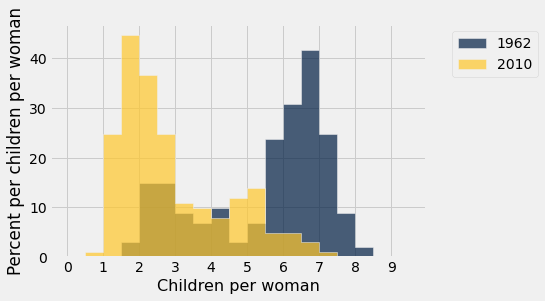

In [15]:
Table().with_columns(
    '1962', fertility.where('time', 1962).column(2),
    '2010', fertility.where('time', 2010).column(2)
).hist(bins=np.arange(0, 10, 0.5), unit='child per woman')
_ = plots.xlabel('Children per woman')
_ = plots.ylabel('Percent per children per woman')
_ = plots.xticks(np.arange(10))

We can see that the statements below  can be correctly inferred from these histograms.

1. At least half of countries had a fertility rate between 5 and 8 in 1962.
1. In 2010, about 40% of countries had a fertility rate between 1.5 and 2.
1. At least half of countries had a fertility rate below 3 in 2010.
1. More countries had a fertility rate above 3 in 1962 than in 2010.



I drew a line plot of the world population from 1800 through 2020 (inclusive of both endpoints). The world population is the sum of all of the countries' populations. You should use the `population` table defined earlier in the project. 

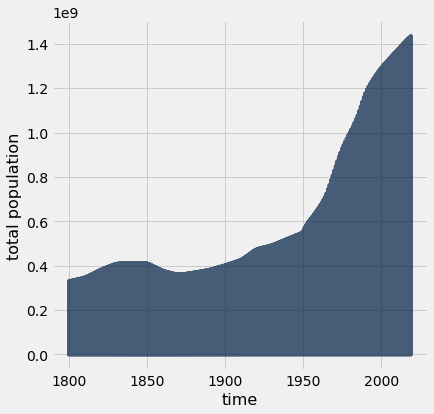

In [16]:
population_grouped = population.drop("geo").relabeled("population_total", "total population").where("time", are.between(1800, 2020))
population_grouped.plot("time", "total population")

I created a function `stats_for_year` that takes a `year` and returns a table of statistics. The table it returns should have four columns: `geo`, `population_total`, `children_per_woman_total_fertility`, and `child_mortality_under_5_per_1000_born`. Each row should contain one unique Alpha-3 country code and three statistics: population, fertility rate, and child mortality for that `year` from the `population`, `fertility` and `child_mortality` tables. I only include rows for which all three statistics are available for the country and year.

In addition, I restricted the result to country codes that appears in `big_50`, an array of the 50 most populous countries in 2020. This restriction will speed up computations later in the project.

After I wrote `stats_for_year`, I tried calling `stats_for_year` on any year between 1960 and 2020. Now, we can understand the output of stats_for_year.




In [17]:
# We first create a population table that only includes the 
# 50 countries with the largest 2020 populations. We focus on 
# these 50 countries only so that plotting later will run faster.
big_50 = population.where('time', are.equal_to(2020)).sort("population_total", descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

population_of_big_50
def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', are.equal_to(year)).drop('time')
    f = fertility.where('time', are.equal_to(year)).drop('time')
    c = child_mortality.where('time', are.equal_to(year)).drop('time')
    return p.join("geo", f).join("geo", c)

stats_for_year(2000)

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,20779957,7.49,129.38
ago,16395477,6.64,205.69
arg,36870796,2.56,19.62
bgd,127657862,3.12,87.28
bra,174790339,2.3,34.77
can,30588379,1.52,6.21
chn,1290550767,1.5,36.81
cod,47105830,6.96,160.84
col,39629965,2.39,24.98
deu,81400883,1.35,5.36


I created a table called `pop_by_decade` with two columns called `decade` and `population`, in this order. It has a row for each year that starts a decade, in increasing order starting with 1960 and ending with 2020. For example, 1960 is the start of the 1960's decade. The `population` column contains the total population of all countries included in the result of `stats_for_year(year)` for the first `year` of the decade. You should see that these countries contain most of the world's population.



In [18]:
def pop_for_year(year):
    """Return the total population for the specified year."""
    return sum(stats_for_year(year).column("population_total"))
pop_for_year(2020)

6765161289

In [19]:
decades = Table().with_column('decade', np.arange(1960, 2021, 10))


pop_by_decade = decades.with_columns('population', decades.apply(pop_for_year, 'decade'))
pop_by_decade.set_format(1, NumberFormatter)

decade,population
1960,"2,635,123,897"
1970,"3,221,457,416"
1980,"3,890,044,418"
1990,"4,656,339,803"
2000,"5,377,062,169"
2010,"6,064,674,132"
2020,"6,765,161,289"


The `countries` table describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. Run the cell below to inspect the data.

In [20]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
countries.select('country', 'name', 'world_6region')

country,name,world_6region
afg,Afghanistan,south_asia
ago,Angola,sub_saharan_africa
alb,Albania,europe_central_asia
and,Andorra,europe_central_asia
are,United Arab Emirates,middle_east_north_africa
arg,Argentina,america
arm,Armenia,europe_central_asia
atg,Antigua and Barbuda,america
aus,Australia,east_asia_pacific
aut,Austria,europe_central_asia


I created a table called `region_counts`. It should contain two columns called `region` and `count`. The `region` column should contain regions of the world, and the `count` column should contain the number of countries in each region that appears in the result of `stats_for_year(2020)`. 

For example, one row would have `south_asia` as its `region` value and an integer as its `count` value: the number of large South Asian countries for which we have population, fertility, and child mortality numbers from 2020.

In [21]:
stats_for_2020 = stats_for_year(2020)
country_region = countries.select('country', 'world_6region')
combined = country_region.join("country", stats_for_2020, "geo")
region_counts = combined.group("world_6region").relabeled("world_6region", "region")
region_counts

region,count
america,8
east_asia_pacific,9
europe_central_asia,10
middle_east_north_africa,7
south_asia,5
sub_saharan_africa,11


The following scatter diagram compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world.

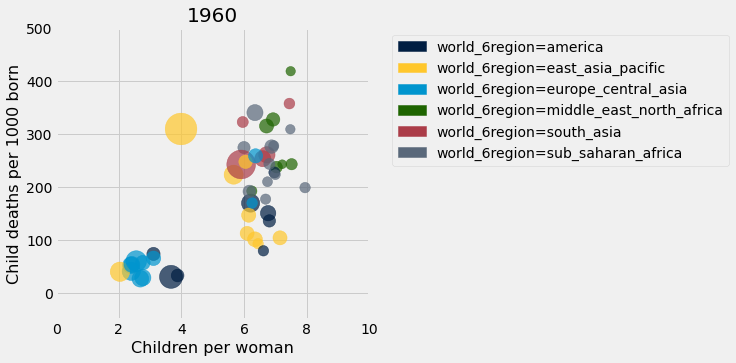

In [22]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabel(2, 'Children per woman').relabel(3, 'Child deaths per 1000 born')

def fertility_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, group=4, s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)
    plots.show()

fertility_vs_child_mortality(1960)

The statements below can be inferred from this scatter diagram for 1960. 
1. Most countries had a fertility rate above 5.
1. There was an association between child mortality and fertility.

The result of the cell below is interactive. Drag the slider to the right to see how countries have changed over time. You'll find that the great divide between so-called "Western" and "developing" countries that existed in the 1960's has nearly disappeared. This shift in fertility rates is the reason that the global population is expected to grow more slowly in the 21st century than it did in the 19th and 20th centuries.

In [23]:
import ipywidgets as widgets

_ = widgets.interact(fertility_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2020, value=1960))

interactive(children=(IntSlider(value=1960, description='year', max=2020, min=1960), Output()), _dom_classes=(…

Now is a great time to take a break and watch the same data presented by [Hans Rosling in a 2010 TEDx talk](https://www.gapminder.org/videos/reducing-child-mortality-a-moral-and-environmental-imperative) with smoother animation and witty commentary.

## 2. Global Poverty

In 1800, 85% of the world's 1 billion people lived in [extreme poverty](https://en.wikipedia.org/wiki/Extreme_poverty), defined by the United Nations as "a condition characterized by severe deprivation of basic human needs, including food, safe drinking water, sanitation facilities, health, shelter, education and information." At the time when the data in this project were gathered, a common definition of extreme poverty was a person living on less than \$1.25 a day.

In 2018, the proportion of people living in extreme poverty was estimated to be [about 9\%](https://unstats.un.org/sdgs/report/2019/goal-01/). Although the world rate of extreme poverty has declined consistently for hundreds of years, the number of people living in extreme poverty is still over 600 million. The United Nations adopted an [ambitious goal](http://www.un.org/sustainabledevelopment/poverty/): "By 2030, eradicate extreme poverty for all people everywhere." In this part of the project we will examine aspects of global poverty that might affect whether the goal is achievable.

First, load the population and poverty rate by country and year and the country descriptions. While the `population` table has values for every recent year for many countries, the `poverty` table only includes certain years for each country in which a measurement of the rate of extreme poverty was available.

In [24]:
population = Table.read_table('population.csv')
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
poverty = Table.read_table('poverty.csv')
poverty.show(3)

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.2
alb,2002,0.73
alb,2004,0.53


I assigned `latest_poverty` to a three-column table with one row for each country that appears in the `poverty` table. The first column should contain the 3-letter code for the country. The second column should contain the most recent year for which an extreme poverty rate is available for the country. The third column should contain the poverty rate in that year

In [25]:
def first(values):
    return values.item(0)

latest_poverty = poverty.sort("time", descending=True).group("geo", first)
latest_poverty = latest_poverty.relabeled(0, 'geo').relabeled(1, 'time').relabeled(2, 'poverty_percent') # You should *not* change this line.
latest_poverty

geo,time,poverty_percent
ago,2009,43.37
alb,2012,0.46
arg,2011,1.41
arm,2012,1.75
aus,2003,1.36
aut,2004,0.34
aze,2008,0.31
bdi,2006,81.32
bel,2000,0.5
ben,2012,51.61


Using both `latest_poverty` and `population`, I created a four-column table called `recent_poverty_total` with one row for each country in `latest_poverty`. The four columns should have the following labels and contents:
1. `geo` contains the 3-letter country code,
1. `poverty_percent` contains the most recent poverty percent,
1. `population_total` contains the population of the country in 2010,
1. `poverty_total` contains the number of people in poverty **rounded to the nearest integer**, based on the 2010 population and most recent poverty rate.

In [26]:
poverty_and_pop = latest_poverty.join("geo", population.where("time", are.equal_to(2010)), "geo")
poverty_and_pop = poverty_and_pop.drop("time", "time_2")
recent_poverty_total = poverty_and_pop.with_columns("poverty_total", np.round(poverty_and_pop.column("poverty_percent") * poverty_and_pop.column("population_total") / 100))
recent_poverty_total

geo,poverty_percent,population_total,poverty_total
ago,43.37,23356247,1.01296e+07
alb,0.46,2948029,13561
arg,1.41,40895751,576630
arm,1.75,2877314,50353
aus,1.36,22154687,301304
aut,0.34,8409945,28594
aze,0.31,9032465,28001
bdi,81.32,8675606,7.055e+06
bel,0.5,10938735,54694
ben,51.61,9199254,4.74774e+06


I assigned the name `poverty_percent` to the known percentage of the world’s 2010 population that were living in extreme poverty. Assume that the `poverty_total` numbers in the `recent_poverty_total` table describe **all** people in 2010 living in extreme poverty. I should get a number that is above the 2018 global estimate of 9%, since many country-specific poverty rates are older than 2018.

The sum of the `population_total` column in the `recent_poverty_total` table is not the world population, because only a subset of the world's countries are included in the `recent_poverty_total` table (only some countries have known poverty rates). I used the `population` table to compute the world's 2010 total population.

In [27]:
poverty_percent =  (sum(recent_poverty_total.column("poverty_total")) / sum(population.where("time", are.equal_to(2010)).column("population_total"))) * 100
poverty_percent

14.248865303997139

The `countries` table includes not only the name and region of countries, but also their positions on the globe.

In [28]:
countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')

country,name,world_4region,latitude,longitude
afg,Afghanistan,asia,33,66
ago,Angola,africa,-12.5,18.5
alb,Albania,europe,41,20
and,Andorra,europe,42.5078,1.52109
are,United Arab Emirates,asia,23.75,54.5
arg,Argentina,americas,-34,-64
arm,Armenia,europe,40.25,45
atg,Antigua and Barbuda,americas,17.05,-61.8
aus,Australia,asia,-25,135
aut,Austria,europe,47.3333,13.3333


Using both `countries` and `recent_poverty_total`, I created a five-column table called `poverty_map` with one row for every country in `recent_poverty_total`.  The five columns should have the following labels and contents:
1. `latitude` contains the country's latitude,
1. `longitude` contains the country's longitude,
1. `name` contains the country's name,
1. `region` contains the country's region from the `world_4region` column of `countries`,
1. `poverty_total` contains the country's poverty total.

In [29]:
clean_countries = countries.select("country", "latitude", "longitude", "name", "world_4region")
cleaned_poverty = recent_poverty_total.select("geo", "poverty_total")
poverty_map = clean_countries.join("country", cleaned_poverty, "geo").drop("country").relabel("world_4region", "region")
poverty_map

latitude,longitude,name,region,poverty_total
-12.5,18.5,Angola,africa,1.01296e+07
41,20,Albania,europe,13561
-34,-64,Argentina,americas,576630
40.25,45,Armenia,europe,50353
-25,135,Australia,asia,301304
47.3333,13.3333,Austria,europe,28594
40.5,47.5,Azerbaijan,europe,28001
-3.5,30,Burundi,africa,7.055e+06
50.75,4.5,Belgium,europe,54694
9.5,2.25,Benin,africa,4.74774e+06


Run the cell below to draw a map of the world in which the areas of circles represent the number of people living in extreme poverty. Double-click on the map to zoom in.

In [30]:
# It may take a few seconds to generate this map.
colors = {'africa': 'blue', 'europe': 'black', 'asia': 'red', 'americas': 'green'}
scaled = poverty_map.with_columns(
    'labels', poverty_map.column('name'),
    'colors', poverty_map.apply(colors.get, 'region'),
    'areas', 1e-4 * poverty_map.column('poverty_total')
).drop('name', 'region', 'poverty_total')

Circle.map_table(scaled)

Although people lived in extreme poverty throughout the world in 2010 (with more than 5 million in the United States), the largest numbers were in Asia and Africa.

I assigned `largest` to a two-column table with the `name` (not the 3-letter code) and `poverty_total` of the 10 countries with the largest number of people living in extreme poverty.

In [31]:
largest = poverty_map.sort("poverty_total", descending=True).take(list(range(0,10))).drop("latitude", "longitude", "region")
largest.set_format('poverty_total', NumberFormatter)

name,poverty_total
India,"291,660,639.00"
Nigeria,"98,319,537.00"
China,"85,687,544.00"
Bangladesh,"63,826,375.00"
"Congo, Dem. Rep.","56,635,412.00"
Indonesia,"39,177,145.00"
Ethiopia,"32,242,742.00"
Pakistan,"22,858,700.00"
Tanzania,"19,281,872.00"
Madagascar,"18,543,643.00"


It is important to study the absolute number of people living in poverty, not just the percent. The absolute number is an important factor in determining the amount of resources needed to support people living in poverty. 

I wrote a function called `poverty_timeline` that takes **the name of a country** as its argument  (not the Alpha-3 country code). It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. The line plot should have a point for each row in the `poverty` table for that country. To compute the population living in poverty from a poverty percentage, multiply by the population of the country **in that year**.

In [32]:
def poverty_timeline(country):
    '''Draw a timeline of people living in extreme poverty in a country.'''
    poverty_table = poverty.join(["geo", "time"], population, ["geo", "time"])
    poverty_table = countries.select("country", "name").join("country", poverty_table, "geo")
    poverty_table = poverty_table.drop("country").relabel("extreme_poverty_percent_people_below_125_a_day", "poverty_percent")
    poverty_table = poverty_table.with_column("poverty_total", poverty_table.column("poverty_percent") * poverty_table.column("population_total"))
    poverty_table = poverty_table.select("name", "time", "poverty_total").where("name", are.equal_to(country))
    poverty_table = poverty_table.drop('name')
    poverty_table = np.round(poverty_table.set_format('poverty_total', NumberFormatter))
    plots.plot("time", "poverty_total", data=poverty_table)
    plots.title(country)
    plots.ylim(bottom=0)
    plots.show()

Finally, I drew the line plots below to see how the world is changing. I paid attention to the axes and checked my work by comparing my graphs to the ones on [gapminder.org](https://www.gapminder.org/tools/#$state$entities$show$country$/$in@=ind;;;;&marker$axis_y$which=number_of_people_in_poverty&scaleType=linear&spaceRef:null;;;&chart-type=linechart).

/Users/elle/Library/Python/3.8/lib/python/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


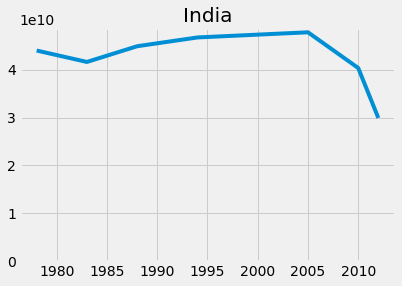

/Users/elle/Library/Python/3.8/lib/python/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


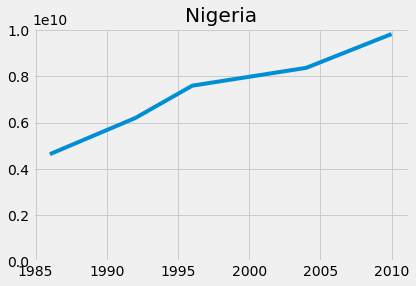

/Users/elle/Library/Python/3.8/lib/python/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


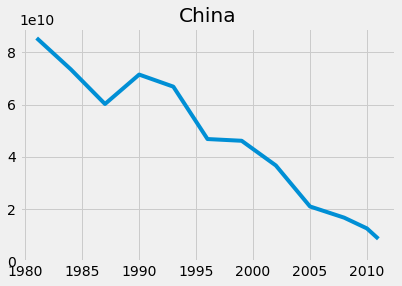

/Users/elle/Library/Python/3.8/lib/python/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


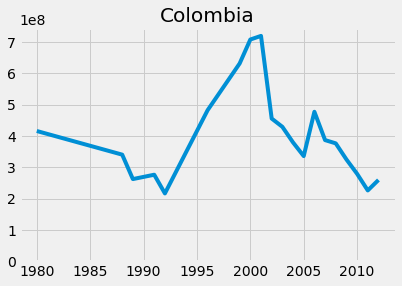

/Users/elle/Library/Python/3.8/lib/python/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


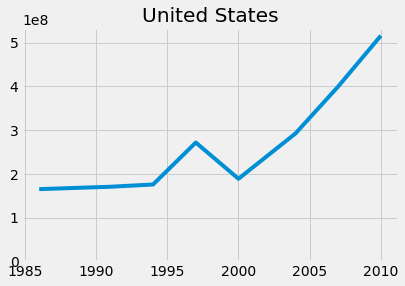

In [33]:
poverty_timeline('India')
poverty_timeline('Nigeria')
poverty_timeline('China')
poverty_timeline('Colombia')
poverty_timeline('United States')

Although the number of people living in extreme poverty increased in some countries including Nigeria and the United States, the decreases in other countries, most notably the massive decreases in China and India, have shaped the overall trend that extreme poverty is decreasing worldwide, both in percentage and in absolute number. 

To learn more, watch [Hans Rosling in a 2015 film](https://www.gapminder.org/videos/dont-panic-end-poverty/) about the UN goal of eradicating extreme poverty from the world. 

Below, I also added an interactive dropdown menu for you to visualize `poverty_timeline` graphs for other countries. Note that each dropdown menu selection may take a few seconds to run.

In [34]:
all_countries = poverty_map.column('name')
_ = widgets.interact(poverty_timeline, country=list(all_countries))

interactive(children=(Dropdown(description='country', options=('Angola', 'Albania', 'Argentina', 'Armenia', 'A…